<a href="https://colab.research.google.com/github/vishalpanchamia/Reasoning-LLMs-from-Scratch/blob/main/Multi_arm_Bandit_Problem_(Exploration_vs_Exploitation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

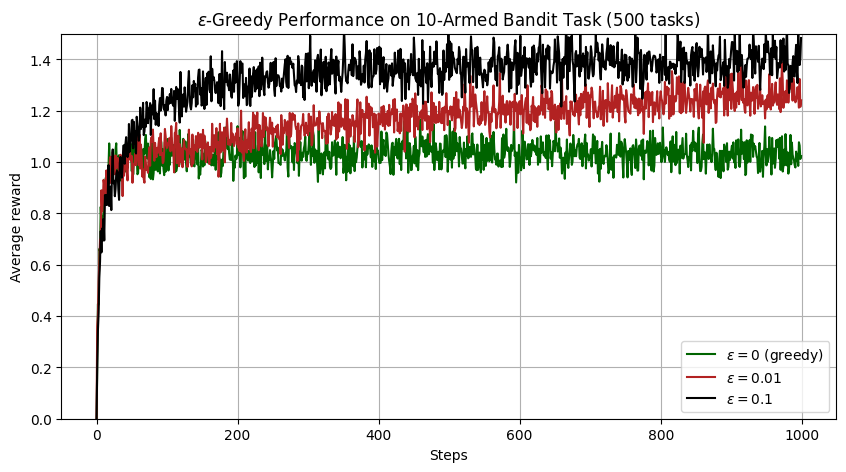

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation settings
n_bandits = 500         # Number of tasks (was 2000 originally)
n_arms = 10             # Number of bandit arms
n_steps = 1000          # Steps per task
epsilons = [0, 0.01, 0.1]
colors = ['darkgreen', 'firebrick', 'black']
labels = [r'$\epsilon = 0$ (greedy)', r'$\epsilon = 0.01$', r'$\epsilon = 0.1$']

# Initialize average rewards for each epsilon
average_rewards = np.zeros((len(epsilons), n_steps))

# Simulation loop
for i, eps in enumerate(epsilons):
    rewards = np.zeros((n_bandits, n_steps))
    for b in range(n_bandits):
        q_true = np.random.normal(loc=0.0, scale=1.0, size=n_arms)  # True action values
        q_est = np.zeros(n_arms)  # Estimated action values
        action_counts = np.zeros(n_arms)

        for t in range(n_steps):
            if np.random.rand() < eps:
                action = np.random.randint(n_arms)  # Exploration
            else:
                max_val = np.max(q_est)
                max_actions = np.flatnonzero(q_est == max_val)
                action = np.random.choice(max_actions)  # Break ties randomly

            reward = np.random.normal(loc=q_true[action], scale=1.0)  # Noisy reward
            action_counts[action] += 1
            q_est[action] += (reward - q_est[action]) / action_counts[action]
            rewards[b, t] = reward

    average_rewards[i] = np.mean(rewards, axis=0)

# Plotting
plt.figure(figsize=(10, 5))
for i in range(len(epsilons)):
    plt.plot(average_rewards[i], label=labels[i], color=colors[i])

plt.title(r'$\epsilon$-Greedy Performance on 10-Armed Bandit Task (500 tasks)')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.5)
plt.show()
